In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [2]:
house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_data.info()

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
col_names = house_data.drop('price', axis = 1).columns[:]

In [ ]:
x = house_data.loc[:, col_names]
x

In [ ]:
y = house_data['price']
y

In [ ]:
# Normalizing x
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = col_names)

# Examine the normalized data
print(house_data.head())
x.head()

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows = 6, figsize = (20, 20))
sns.regplot(y = house_data['price'], x = x['bathrooms'], ax = axs[0, 0])
sns.regplot(y = house_data['price'], x = x['bedrooms'], ax = axs[0, 1])
sns.regplot(y = house_data['price'], x = x['floors'], ax = axs[0, 2])
sns.regplot(y = house_data['price'], x = x['sqft_living'], ax = axs[1, 0])
sns.regplot(y = house_data['price'], x = x['sqft_above'], ax = axs[1, 1])
sns.regplot(y = house_data['price'], x = x['sqft_lot'], ax = axs[1, 2])
sns.regplot(y = house_data['price'], x = x['sqft_basement'], ax = axs[2, 0])
sns.regplot(y = house_data['price'], x = x['sqft_living15'], ax = axs[2, 1])
sns.regplot(y = house_data['price'], x = x['sqft_lot15'], ax = axs[2, 2])
sns.regplot(y = house_data['price'], x = x['lat'], ax = axs[3, 0])
sns.regplot(y = house_data['price'], x = x['long'], ax = axs[3, 1])
sns.regplot(y = house_data['price'], x = x['zipcode'], ax = axs[3, 2])
sns.regplot(y = house_data['price'], x = x['condition'], ax = axs[4, 0])
sns.regplot(y = house_data['price'], x = x['grade'], ax = axs[4, 1])
sns.regplot(y = house_data['price'], x = x['yr_built'], ax = axs[4, 2])
sns.regplot(y = house_data['price'], x = x['waterfront'], ax = axs[5, 0])
sns.regplot(y = house_data['price'], x = x['view'], ax = axs[5, 1])
sns.regplot(y = house_data['price'], x = x['yr_renovated'], ax = axs[5, 2])

plt.tight_layout()

In [ ]:
# house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')

# cols_to_drop = ['lat','long']
# house_data.drop(columns = cols_to_drop, axis = 1, inplace = True)

In [3]:
features = house_data.drop('price', axis = 1)
target = house_data['price']

In [4]:
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.2, random_state = 2)
print("Train features shape : ", train_features.shape)
print("Train target shape   : ", train_target.shape)
print("Test features shape  : ", test_features.shape)
print("Test target shape    : ", test_target.shape)

Train features shape :  (13290, 18)
Train target shape   :  (13290,)
Test features shape  :  (3323, 18)
Test target shape    :  (3323,)


In [ ]:
# selecting features using f_regression (or) mutual_info_regression

# from sklearn.feature_selection import SelectKBest, f_regression
# X_new = SelectKBest(f_regression, k=18).fit_transform(features, target)
# X_new.shape

# from sklearn.feature_selection import SelectKBest, mutual_info_regression
# X_new = SelectKBest(mutual_info_regression, k=18).fit_transform(features, target)
# X_new.shape

In [5]:
# Baseline LinearRegression Model

model = LinearRegression(normalize = True, fit_intercept=True)
base_model = model.fit(train_features, train_target)

In [ ]:
# coeffs = pd.DataFrame({'features':features.columns, 'coeffs':model.coef_})
# coeffs

In [ ]:
# import statsmodels.api as sm
# ols = sm.OLS(train_target, train_features)
# ols_result = ols.fit()
# ols_result.summary()

In [7]:
# Noting down accuracy of the baseline model

# finding our predicted values
train_target_pred = model.predict(test_features)

# Calculating the rmse and R2 Score by comparing the actual and predicted values
rmse = (np.sqrt(mean_squared_error(test_target, train_target_pred)))
r2 = r2_score(test_target, train_target_pred)

print("Baseline Model RMSE:", rmse)
print("Baseline Model R2 Score:", r2)

Baseline Model RMSE: 203757.50241186487
Baseline Model R2 Score: 0.7145267343735493


In [8]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= model , step = 1)

# Fit the function for ranking the features
fit = rfe.fit(train_features, train_target)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 9
Selected Features: [False  True False False  True  True  True  True  True False False  True
 False False  True  True False False]
Feature Ranking: [ 2  1  3 10  1  1  1  1  1  4  5  1  8  6  1  1  7  9]


### Representing feature ranks in the form of a table

Through the output mentioned above we can't understand which feature has a better rank unless we see the index of each. In order to better visualise, we can put it in the form of a table with ranking as mentioned below.


In [9]:
selected_rfe_features = pd.DataFrame({'Feature':list(train_features.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
8,grade,1
1,bathrooms,1
15,long,1
14,lat,1
4,floors,1
5,waterfront,1
6,view,1
7,condition,1
11,yr_built,1
0,bedrooms,2


In [11]:
# Transforming the data
X_train_rfe = rfe.transform(train_features)
X_test_rfe = rfe.transform(test_features)

# Fitting our baseline model with the transformed data
lr_rfe_model = model.fit(X_train_rfe, train_target)

In [12]:
# Comparing the models

# finding our predicted values
y_pred_rfe = lr_rfe_model.predict(X_test_rfe)

# Calculating the rmse and R2 Score by comparing the actual and predicted values
rfe_rmse = (np.sqrt(mean_squared_error(test_target, y_pred_rfe)))
rfe_r2 = r2_score(test_target, y_pred_rfe)

print("RFE Model RMSE:", rfe_rmse)
print("RFE Model R2 Score:", rfe_r2)

RFE Model RMSE: 217547.29427803485
RFE Model R2 Score: 0.6745789827469739


### Training a Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest classifier
rfr = RandomForestRegressor(n_estimators=1000, random_state=1, n_jobs=-1)

# n_estimators = The number of trees in the forest.
# n_jobs = -1 : Use all processors for training

# Train the regressor
rfr.fit(train_features, train_target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

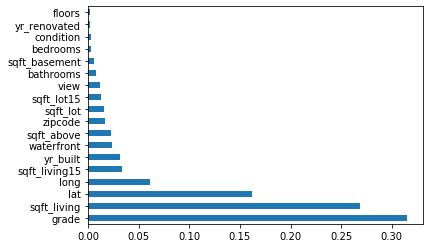

In [18]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rfr.feature_importances_, index=train_features.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

In [19]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# It will select the features based on the importance score
rfr_sfm = SelectFromModel(rfr)

#Alternatively if you want to set a specific threshold and select the features you may the following code that is commented
# features that have an importance of more than 0.13 ( all top 4 features lie above this)
# rf_sfm = SelectFromModel(rf_clf, threshold=0.13)

# Train the selector
rfr_sfm = rfr_sfm.fit(train_features, train_target)

In [20]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = rfr_sfm.transform(train_features)
X_important_test = rfr_sfm.transform(test_features)

In [21]:
# Create a new random forest classifier for the most important features
rfr_important = RandomForestRegressor(n_estimators=1000, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
rfr_important = rfr_important.fit(X_important_train, train_target)

In [24]:
# Comparing the models

# finding our predicted values
y_pred_rfr = rfr.predict(test_features)

# Calculating the rmse and R2 Score by comparing the actual and predicted values
rfr_rmse = (np.sqrt(mean_squared_error(test_target, y_pred_rfr)))
rfr_r2 = r2_score(test_target, y_pred_rfr)

print("RFR Model RMSE:", rfr_rmse)
print("RFR Model R2 Score:", rfr_r2)

RFR Model RMSE: 141290.93159243016
RFR Model R2 Score: 0.8627327910572489


In [26]:
# Apply The Full Featured Classifier To The Test Data
y_imp_pred = rfr_important.predict(X_important_test)

# Calculating the rmse and R2 Score by comparing the actual and predicted values
rfr_imp_rmse = (np.sqrt(mean_squared_error(test_target, y_imp_pred)))
rfr_imp_r2 = r2_score(test_target, y_imp_pred)

print("Limited RFR Model RMSE:", rfr_imp_rmse)
print("Limited RFR Model R2 Score:", rfr_imp_r2)

Limited RFR Model RMSE: 165469.40586138857
Limited RFR Model R2 Score: 0.81173324329665


## Applying the Boruta Method

In [27]:
!pip install Boruta

In [28]:
from boruta import BorutaPy

# define Boruta feature selection method
# boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
boruta_selector = BorutaPy(rfr, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(train_features), np.array(train_target))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	12
Tentative: 	0
Rejected: 	6


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	12
Tentative: 	0
Rejected: 	6


BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=50, n_jobs=-1,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x2A7FE676DB0,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random_st

In [29]:
# check selected features
print("Selected Features: ", boruta_selector.support_)
 
# check ranking of features
print("Ranking: ",boruta_selector.ranking_)

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [False False  True  True False  True  True False  True  True False  True
 False  True  True  True  True  True]
Ranking:  [5 2 1 1 7 1 1 4 1 1 3 1 6 1 1 1 1 1]
No. of significant features:  12


In [30]:
# Let's visualise it better in the form of a table
selected_rfr_features = pd.DataFrame({'Feature':list(train_features.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfr_features.sort_values(by='Ranking')

,Feature,Ranking
8,grade,1
15,long,1
14,lat,1
13,zipcode,1
11,yr_built,1
9,sqft_above,1
16,sqft_living15,1
17,sqft_lot15,1
6,view,1
5,waterfront,1


In [31]:
# New subset with only the imp features

X_imp_train = boruta_selector.transform(np.array(train_features))
X_imp_test = boruta_selector.transform(np.array(test_features))

In [32]:
# Create a new random forest regressor for the most important features
rfr_imp = RandomForestRegressor(n_estimators=1000, random_state=1, n_jobs=-1)

# Train the new regressor on the new dataset containing the most important features
rfr_imp.fit(X_imp_train, train_target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [33]:
# Apply The Full Featured Classifier To The Test Data
rfr_imp_pred = rfr_imp.predict(X_imp_test)

# Calculating the rmse and R2 Score by comparing the actual and predicted values
boruta_rfr_imp_rmse = (np.sqrt(mean_squared_error(test_target, rfr_imp_pred)))
boruta_rfr_imp_r2 = r2_score(test_target, rfr_imp_pred)

print("Boruta RFR Model RMSE:", boruta_rfr_imp_rmse)
print("Boruta RFR Model R2 Score:", boruta_rfr_imp_r2)

Boruta RFR Model RMSE: 141385.97590409548
Boruta RFR Model R2 Score: 0.862548053716734


# Evalution on Practice Dataset 

In [38]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')

In [39]:
price = rfr.predict(test_new)

In [40]:
res = pd.DataFrame(price)
res.index = test_new.index # its important for comparison
res.columns = ["price"]
res.to_csv("prediction_results_lin_reg_ex.csv")      # the csv file will be saved locally on the same location where this notebook is located.